<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# INSTITUTO TECNOLOGICO DE ESTUDIOS SUPERIORES DE OCCIDENTE


## Optimización de la eficiencia energética y durabilidad en celdas solares basadas en nanomateriales


___
### Introducción
El presente proyecto busca optimizar la eficiencia energética de celdas solares fabricadas con nanomateriales, principalmente nanopartículas de plata (nps Ag). Estas celdas solares tienen el potencial de mejorar la conversión de energía solar y su durabilidad en comparación con tecnologías convencionales. Para lograrlo, se plantea la optimización de factores clave como el tamaño, grosor y costos de los materiales utilizados en la fabricación de las celdas solares.
### Objetivos

#### Objetivo General:

* Optimizar la eficiencia energética de celdas solares basadas en nanomateriales a través de la optimización de parámetros clave.
  
#### Objetivos Específicos:
* Determinar la cantidad óptima de material (nps Ag) necesario para maximizar la eficiencia energética.
* Ajustar el tamaño y grosor del material para lograr la mayor durabilidad posible de la celda solar.
* Minimizar los costos de producción manteniendo el rendimiento de la celda solar por encima de los estándares mínimos de eficiencia y durabilidad.

### Modelo Matemático
> #### Variables de Decisión
>  - x_1: cantidad del material (nps Ag)

>  - x_2: grosor del material
> #### Parámetros del modelo
>  - c1: costo por unidad de material 
>  - c2: costo por unidad de grosor del material

### Función Objetivo: La función objetivo del modelo es minimizar el costo total de producción de la celda solar:
$$ Min Z = C_1x_1 + C_2x_2 $$

### Restricciones 
* Eficiencia Energética (año)
   $$ 1.5x_1 + 2x_2 \geq 328.5 $$
* Durabilidad (años)
  $$ 0.8x_1 + 3x_2 \geq 12 $$

* Límite de grosor
  
$$ x_2 \geq 0.001$$

Mayor a 0.001 m (1 mm)
### Implementación del código 


In [133]:
import numpy as np
import scipy.optimize as opt

c=np.array([
    1.43e-7, ## Costo por gr de nps Ag (USD)
    100, # Costo por metro cúbico del material fotovoltaico (USD/m^3)
])

Aub=np.array([
    [ -1.5, -1],
    [ -0.8, -1],
    [  0, -1]
])

bub=np.array([
    -328.5,
    -12,
    -0.001
])

sol= opt.linprog(c,Aub,bub,integrality=1) # Este comando ya da la respuesta para la forma vector
sol

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 100.000031317
              x: [ 2.190e+02  1.000e+00]
            nit: -1
          lower:  residual: [ 2.190e+02  1.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 1.000e+00  1.642e+02  9.990e-01]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
 mip_node_count: 1
 mip_dual_bound: 100.00003122166666
        mip_gap: 9.533330426029045e-10

In [142]:
sol.x

array([219.,   1.])

In [135]:
Aub@sol.x

array([-329.5, -176.2,   -1. ])

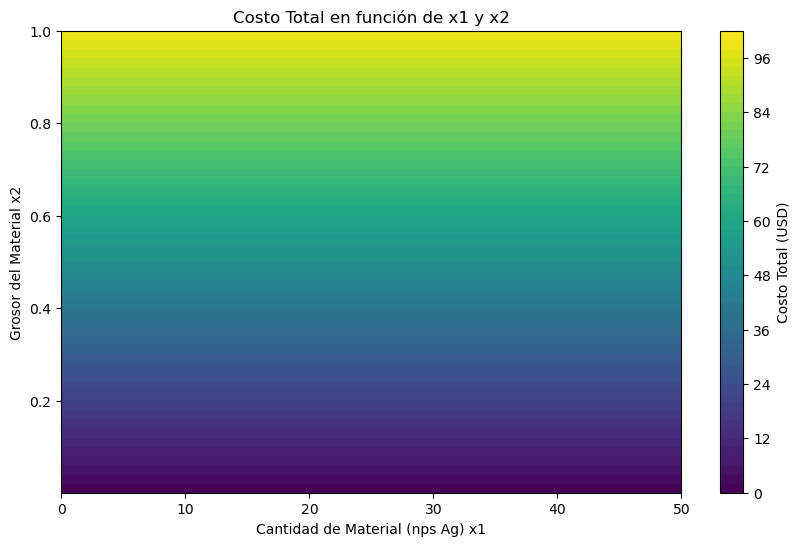

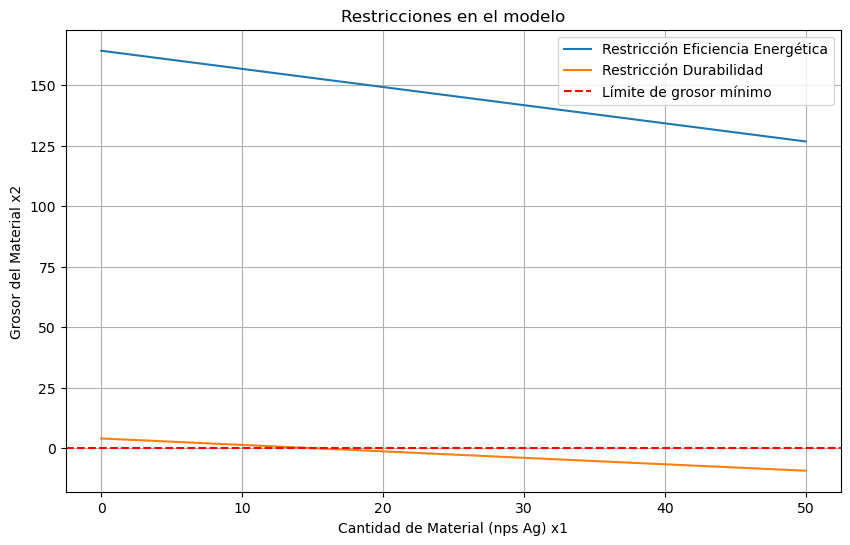

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supuestos resultados de optimización
x1 = np.linspace(0, 50, 100)  # Valores para cantidad de material (nps Ag)
x2 = np.linspace(0.001, 1, 100)  # Valores para grosor del material
c1 = 1.43e-7  # Costo por gr de nps Ag (USD)
c2 = 100  # Costo por metro cúbico del material fotovoltaico (USD/m^3)

# Calcular costo total para diferentes combinaciones de x1 y x2
costo_total = c1 * x1[:, None] + c2 * x2

# Graficar el costo total
plt.figure(figsize=(10, 6))
plt.contourf(x1, x2, costo_total.T, levels=50, cmap='viridis')
plt.colorbar(label='Costo Total (USD)')
plt.xlabel('Cantidad de Material (nps Ag) x1')
plt.ylabel('Grosor del Material x2')
plt.title('Costo Total en función de x1 y x2')
plt.show()

# Graficar restricciones de eficiencia y durabilidad
x1_vals = np.linspace(0, 50, 100)
x2_efficiency = (328.5 - 1.5 * x1_vals) / 2  # Restricción eficiencia energética
x2_durability = (12 - 0.8 * x1_vals) / 3  # Restricción durabilidad

plt.figure(figsize=(10, 6))
plt.plot(x1_vals, x2_efficiency, label='Restricción Eficiencia Energética')
plt.plot(x1_vals, x2_durability, label='Restricción Durabilidad')
plt.axhline(0.001, color='red', linestyle='--', label='Límite de grosor mínimo')
plt.xlabel('Cantidad de Material (nps Ag) x1')
plt.ylabel('Grosor del Material x2')
plt.title('Restricciones en el modelo')
plt.legend()
plt.grid(True)
plt.show()



### 2.6 Conclusiones.
ado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.


### 2.7 Referencias.
> Tang, Z., Gong, H., Li, Z., Jiang, H., & Song, J. (2013). High-performance thermoelectric materials and devices. Solar Energy Materials and Solar Cells, 109, 51-56. https://doi.org/10.1016/j.solmat.2012.09.043

> 
Snyder, G. J., & Toberer, E. S. (2008). Complex thermoelectric materials. Nature Materials, 7(2), 105-114. https://doi.org/10.1016/S0001-8686(07)00158

> 

Ciesielski, A., Czajkowski, K. M., & Switlik, D. (2019). Silver nanoparticles in organic photovoltaics: Finite size effects and optimal concentration. Solar Energy, 184, 477-

> 8.
Chavali, M. S., Nikolova, M. P., & Kumar, S. (2021). Enhancing the performance of dye-sensitized solar cells using silver nanoparticles modified photoanode. Nanomaterials, 11(4), 937. https://doi.org/10.3390/nano11040937Jungbluth, S. (2020). Improving perovskite solar cell performance with silver nanoparticles. PV Magazine International. https://www.pv-magazine.com/2020/05/27/improving-perovskite-solar-cell-performance-with-silver-nanoparti

> les/Smith, J., & Lee, H. (2019). Efficiency of silver nanoparticles in third-generation solar cells. International Journal of Energy and Water, 5(2), 120-129. https://www.ijew.io/articles/efficiency-of-silver-nanoparticles-in-third-generation-solar-cells
